In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#checking for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

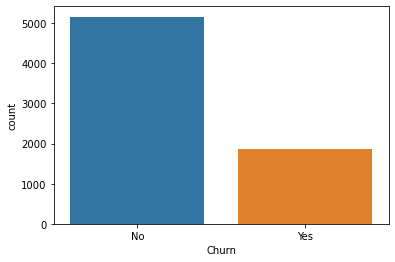

In [8]:
#checking for the balance of the class label
sns.countplot(data=df,x='Churn');

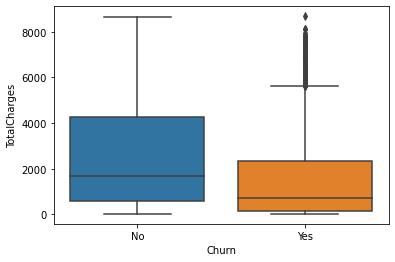

In [10]:
# Exploring the distribution of Total charges between Churn Categories
sns.boxplot(data=df,x='Churn',y='TotalCharges');

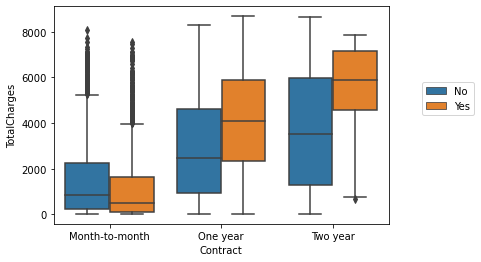

In [11]:
# Boxplot showing the distribution of TotalCharges per contract, hue colored based on Churn 
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5));

In [19]:
#Getting dummies for the categorical variables
dummy_variables = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [20]:
#Calculating the correlation between the features and the target label
corr_df = dummy_variables.corr()

In [24]:
#Sorting the correlation dataframe and removing the target label correlation with itself
corr_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

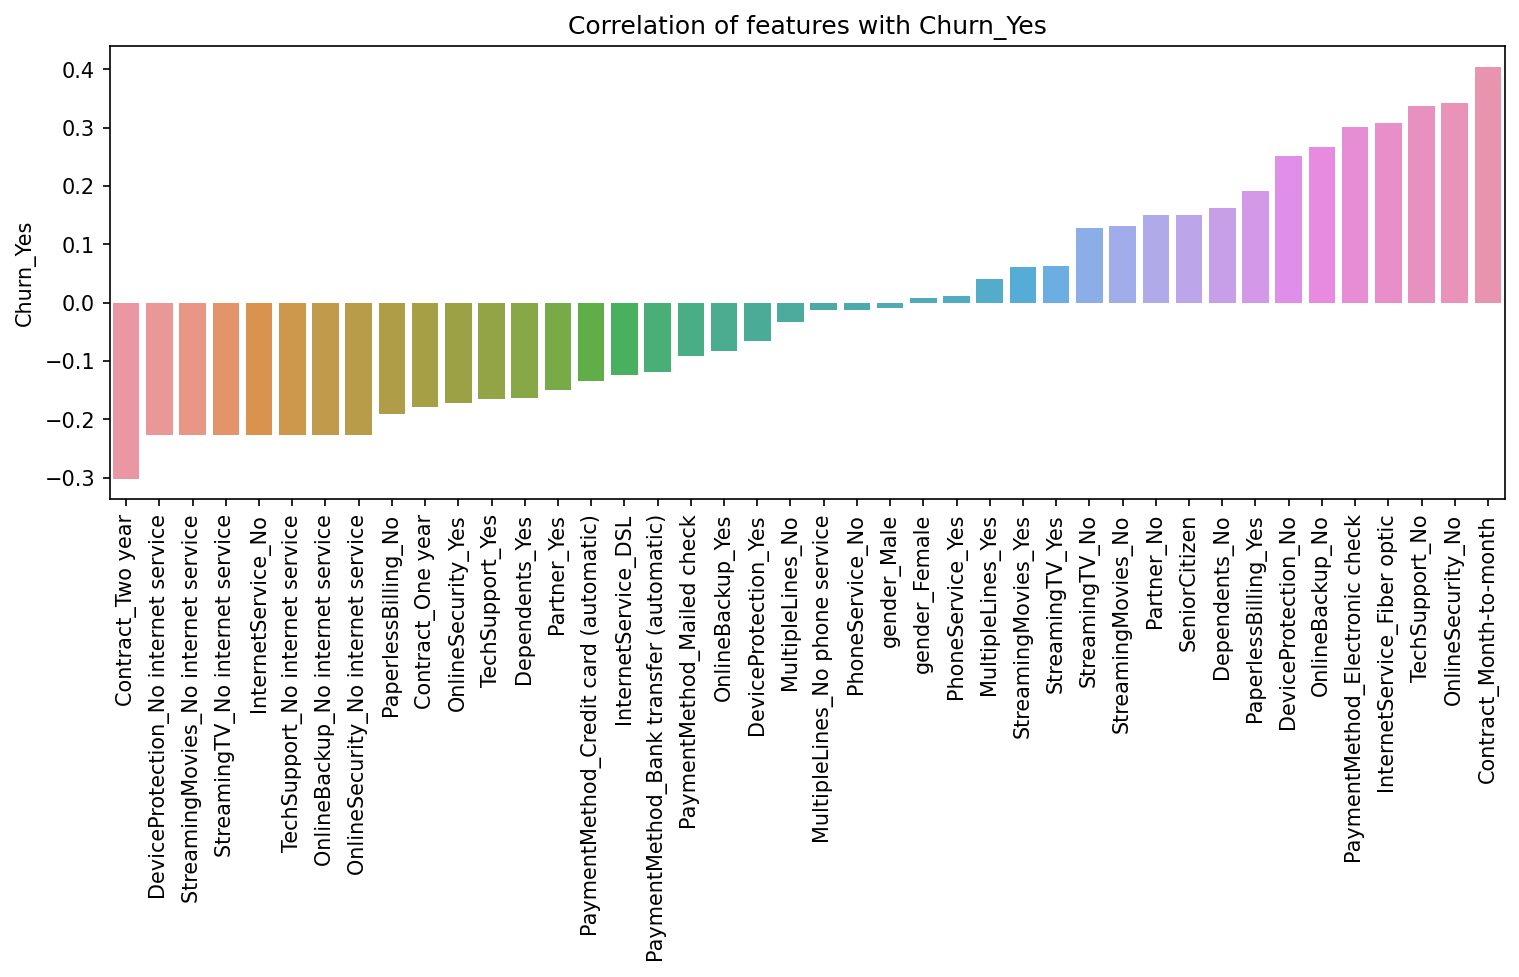

In [27]:
#plotting the correlation between the features and target label
plt.figure(figsize=(12,4),dpi=150)
plt.title('Correlation of features with Churn_Yes')
sns.barplot(x=corr_churn.index,y=corr_churn)
plt.xticks(rotation=90);

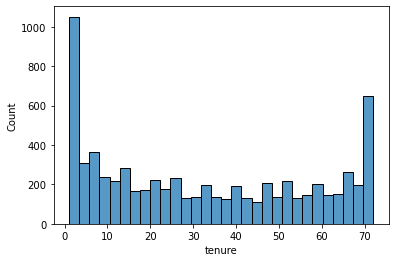

In [29]:
# 
sns.histplot(data=df,x='tenure',bins=30);

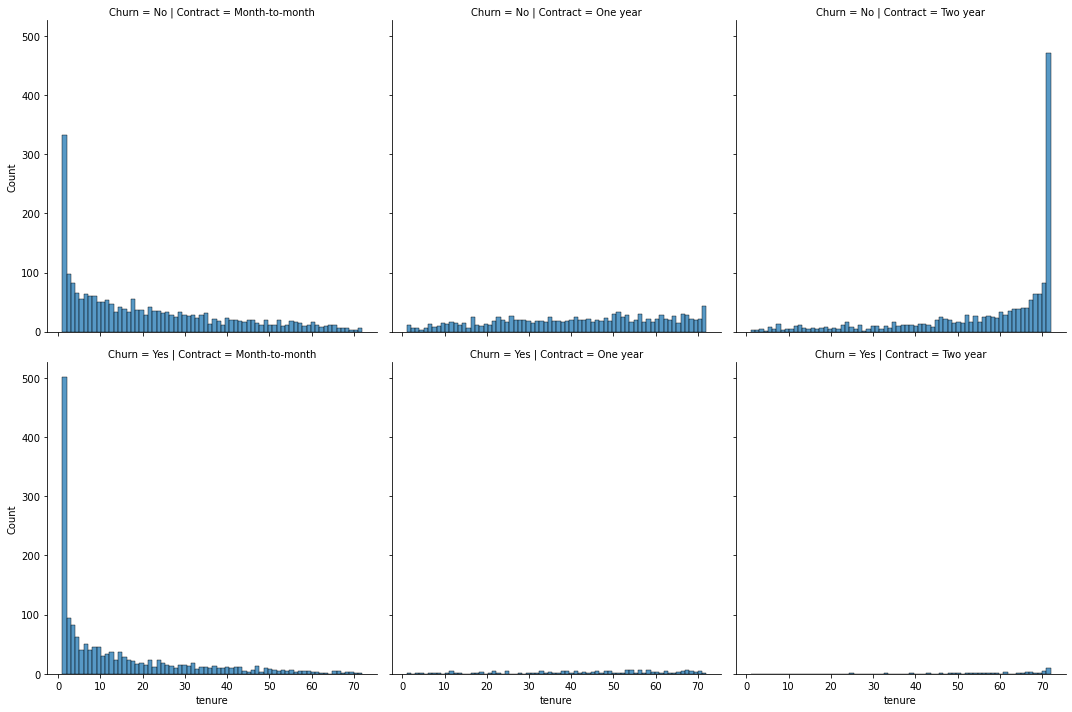

In [30]:
# Comparing the tenure of customers based on Churn and Contract
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

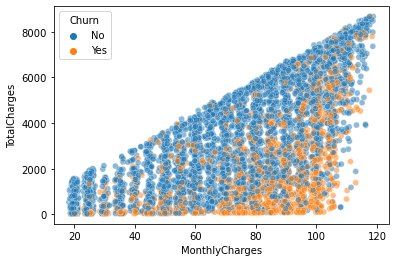

In [32]:
# Scatterplot comparing monthly and total charges based on churn
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5);

In [36]:
# Grouping customers based of their tenure term and churn
churn_yes = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [37]:
# Grouping customers based of their tenure term and churn
churn_no = df.groupby(['Churn','tenure']).count().transpose()['No']

In [39]:
churn_rate = churn_yes/(churn_yes+churn_no)*100

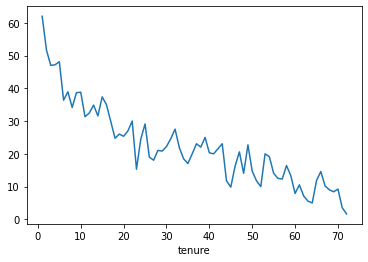

In [43]:
#Plotting tenure vs percentage of customers that churned
churn_rate.transpose()['customerID'].plot();

In [44]:
#Creating 4 separate categories of tenure
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [45]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [46]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


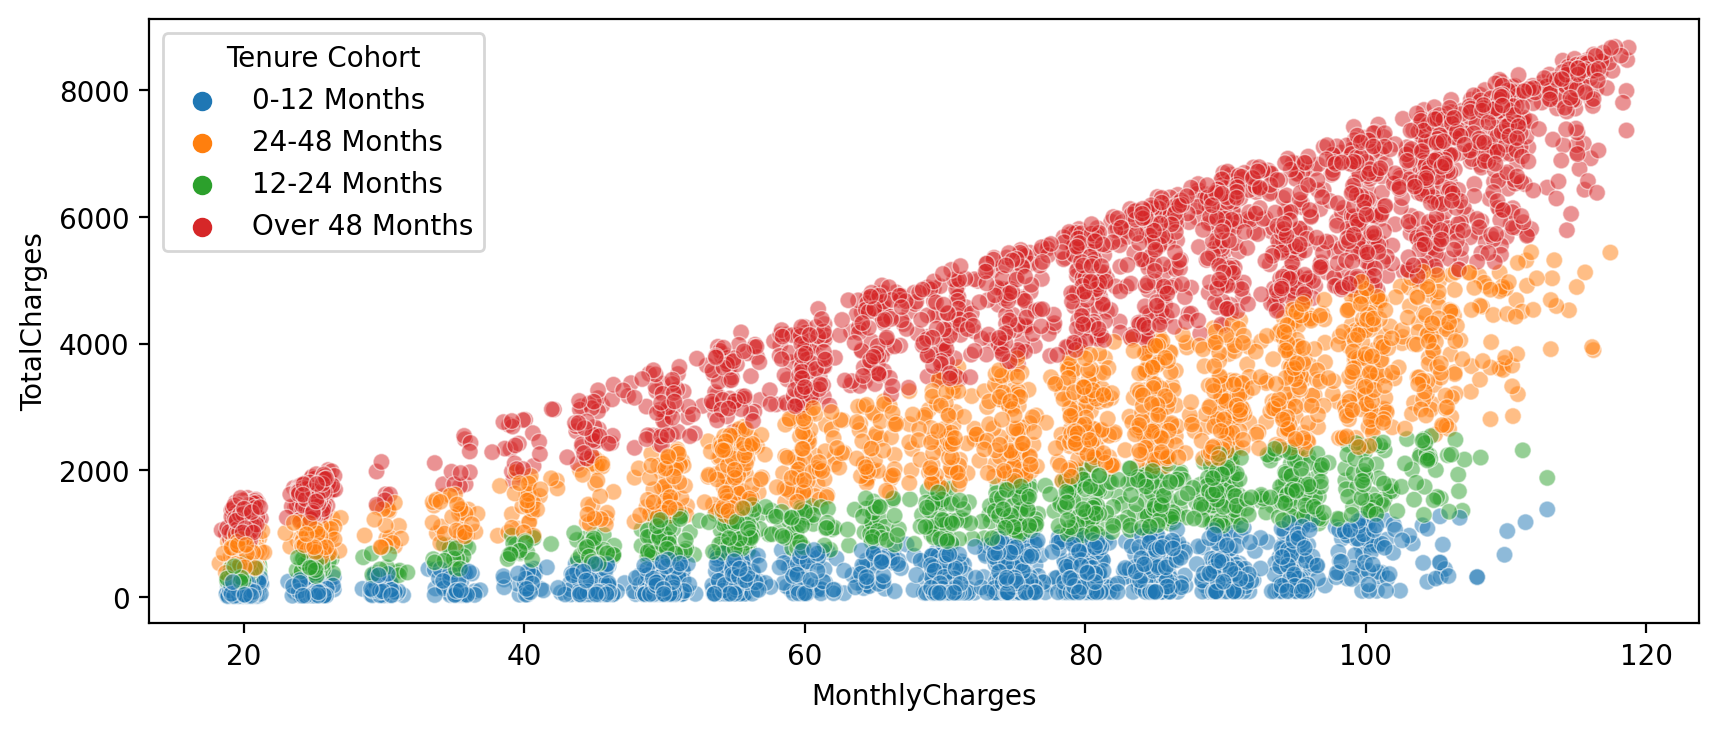

In [48]:
# A scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5);

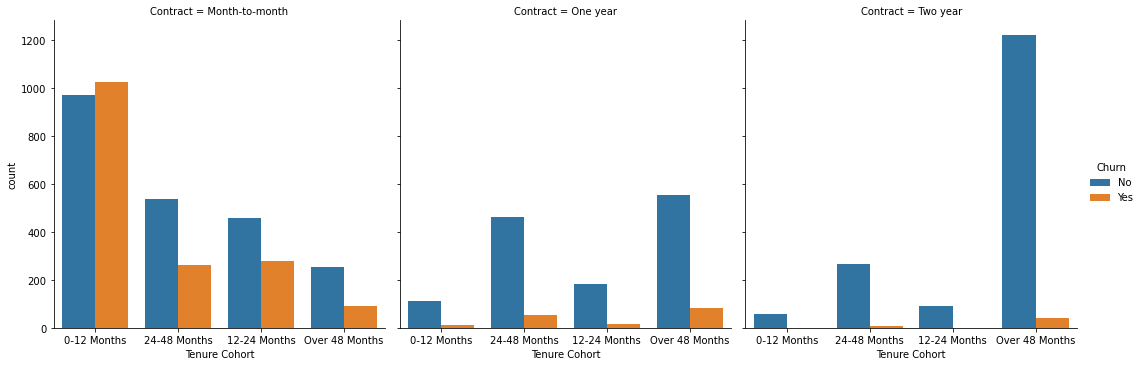

In [51]:
# a  grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

In [53]:
#Separating out the variables
X = pd.get_dummies(df.drop(['Churn','customerID'],axis=1),drop_first=True)
y=df['Churn']

In [54]:
#Creating a train test split
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [56]:
#Train a single decision tree
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(max_depth=6)

In [58]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [60]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [61]:
preds = dt.predict(X_test)

In [62]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



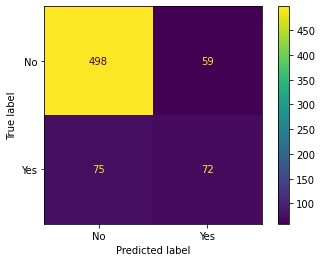

In [64]:
plot_confusion_matrix(dt,X_test,y_test);

In [72]:
#Calculating Feature Importances for the decision tree
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feat Imp'])
imp_feats = imp_feats[imp_feats['Feat Imp']>0]

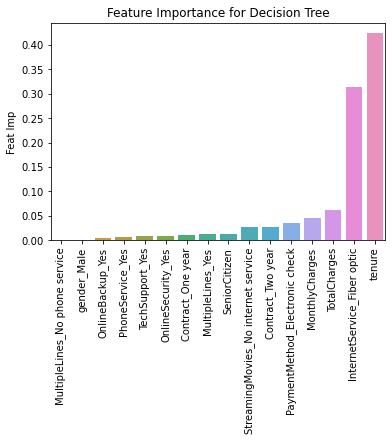

In [75]:
sns.barplot(data=imp_feats.sort_values('Feat Imp'),x=imp_feats.sort_values('Feat Imp').index,y='Feat Imp')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [76]:
# Random Forest model and create a classification report and confusion matrix from its predicted results on the test set
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(max_depth=6)

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [83]:
preds = rf.predict(X_test)

In [84]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
#AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results
ada_model = AdaBoostClassifier(n_estimators=100)

In [94]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [95]:
preds = ada_model.predict(X_test)

In [96]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



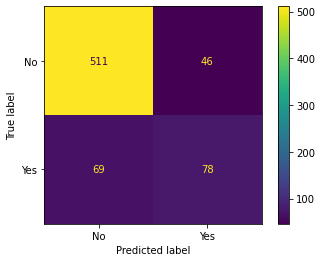

In [99]:
plot_confusion_matrix(ada_model,X_test,y_test);

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

In [105]:
scaled_X_train = scaler.fit_transform(X_train)

In [106]:
scaled_X_test = scaler.transform(X_test)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_model = LogisticRegression()

In [109]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [110]:
preds = log_model.predict(scaled_X_test)

In [111]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



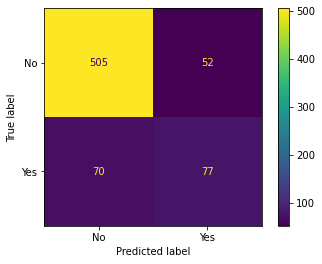

In [113]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [114]:
from sklearn.svm import SVC

In [115]:
svc_model = SVC()

In [116]:
svc_model.fit(scaled_X_train,y_train)

SVC()

In [117]:
preds = svc_model.predict(scaled_X_test)

In [118]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



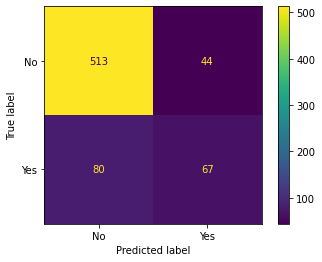

In [120]:
plot_confusion_matrix(svc_model,scaled_X_test,y_test);